In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cat_dict_labels = {"L2a":'Understanding Judgement', "L2b":'Understanding Cognitive Distortions', "L2c":'Understanding Harmful Self-talk', "L2d":'Understanding Common Symptom Indicators/emotions', "L2e":'Understanding Pronoun Perspectives', "L2f":'Understanding Healthy Patterns'}

In [3]:
with open('analysisresults.pickle', 'rb') as handle:
        analysis_results = pickle.load(handle)

In [4]:
df = pd.DataFrame(analysis_results)
# drop all writing samples,
df = df.drop(df[df['title'] == 'Writing Sample'].index)

In [5]:
df.head(3)

,filename,title,start_time,n_characters,n_words,content,espresso_analysis,duration,pauses,concat2,L1_toggleOn_list,L1_toggleOff_list,L1_events_list,concat1b,popup_evts,sidebar_evts
0,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623,2237,412,Feeling worse than yesterday. I kept wasting m...,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",16.753918,"{'plot': True, 'count': 35, 'pauselist_idx': [...",index timestamp type keycode ...,[136],[],[],level_0 index timestamp type keycod...,[],[]
1,report_P8.json,things about uncertainty_v2,2022-07-12 05:13:36.530,1188,221,This is the version with AI assisted. \n\nAs s...,"{'L2a': 1, 'L2b': 1, 'L2c': 0, 'L2d': 0, 'L2e'...",15.087017,"{'plot': True, 'count': 31, 'pauselist_idx': [...",index timestamp type keycode ...,"[35, 834]",[833],"[824, 825, 826, 827]",level_0 index timestamp type keycod...,"[127, 128]",[]
2,report_P8.json,Last day but a good day,2022-07-14 20:59:02.109,1858,344,This will be my last random writing for this s...,"{'L2a': 1, 'L2b': 5, 'L2c': 1, 'L2d': 2, 'L2e'...",15.019222,"{'plot': True, 'count': 34, 'pauselist_idx': [...",index timestamp type keycode \ 0...,[115],[],"[2540, 2541, 2542]",level_0 index timestamp type keycod...,"[116, 117, 1149, 1150, 1443, 1444, 2546, 2547,...",[]


In [6]:
df.columns

Index(['filename', 'title', 'start_time', 'n_characters', 'n_words', 'content',
       'espresso_analysis', 'duration', 'pauses', 'concat2',
       'L1_toggleOn_list', 'L1_toggleOff_list', 'L1_events_list', 'concat1b',
       'popup_evts', 'sidebar_evts'],
      dtype='object')

In [19]:
# split by filename and sort by time
df_1 = df[df['filename']=='report_P8.json'].sort_values(by=['start_time'])
# df_1 = df
# expand pause subanalysis
df_1 = pd.concat([df_1, df_1['pauses'].apply(pd.Series)], axis=1).drop(columns="pauses").rename(columns={"plot":"pause_plot", "count": "pause_count", "frequency":"pause_freq", "plot_data": "pause_plotdata"})
df_1.columns

Index(['filename', 'title', 'start_time', 'n_characters', 'n_words', 'content',
       'espresso_analysis', 'duration', 'concat2', 'L1_toggleOn_list',
       'L1_toggleOff_list', 'L1_events_list', 'concat1b', 'popup_evts',
       'sidebar_evts', 'pause_plot', 'pause_count', 'pauselist_idx',
       'pauselist', 'totalpausetime', 'pause_freq', 'pause_plotdata'],
      dtype='object')

In [20]:
df_1 = df_1.dropna(subset=["pauselist"])

In [21]:
s = df_1.apply(lambda x: pd.Series(x['pauselist']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'pausefull'
df_1_exp = df_1.join(s)
df_1_exp = pd.concat([df_1_exp, df_1_exp['pausefull'].apply(pd.Series)], axis=1).drop(columns="pausefull")
df_1_exp.columns
df_1_exp = df_1_exp[['filename', 'title', 'start_time', 'espresso_analysis', 'duration', 'timestamp', 'text', 'marks', 'placeholder', 'session_id']]
df_1_exp.describe(include = 'all')

/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_77430/1989552814.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_1_exp.describe(include = 'all')


,filename,title,start_time,espresso_analysis,duration,timestamp,text,marks,placeholder,session_id
count,100,100,100,100,100.000000,100.000000,100,100,100,100.0
unique,1,3,3,3,NaN,NaN,98,54,8,NaN
top,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623000,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",NaN,NaN,This will be my last random writing for this s...,"[{'tag': 'L2-highlight', 'from': {'line': 0, '...",,NaN
freq,100,35,35,35,NaN,NaN,2,14,54,NaN
first,NaN,NaN,2022-07-12 01:54:00.623000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-07-14 20:59:02.109000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,15.647382,537433.419000,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.816527,241379.792833,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,15.019222,31265.300000,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,15.019222,379940.175000,NaN,NaN,NaN,0.0


In [22]:
df_1_exp.head(3)

,filename,title,start_time,espresso_analysis,duration,timestamp,text,marks,placeholder,session_id
0,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",16.753918,121675.9,Feeling worse than yesterday. I kept wasting m,[],,0
0,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",16.753918,126946.4,Feeling worse than yesterday. I kept wasting m...,[],,0
0,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",16.753918,154836.0,Feeling worse than yesterday. I kept wasting m...,"[{'tag': 'L2-highlight', 'from': {'line': 0, '...",A different point of view can be...,0


In [23]:
df_1_exp['text'] = df_1_exp['text'].apply(getlastsentence)

In [24]:
df_1_exp.to_csv('PAUSE_DATA.csv')

In [25]:
def getlastsentence(text):
    #test = "In this long. "
    try:
        sentence_list = text.split(".")
        if len(sentence_list[-1]) > 2:
            # print(f"\r{sentence_list[-1]}")
            return sentence_list[-1]
        else:
            # print(f"\r{sentence_list[-1]}")
            return sentence_list[-2]
    except:
        return pd.NA
    

<AxesSubplot:>

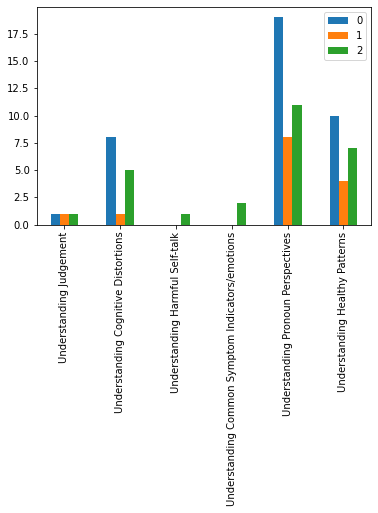

In [26]:
pd.DataFrame(list(df_1['espresso_analysis'])).T.rename(index=cat_dict_labels).plot(kind='bar')

<AxesSubplot:>

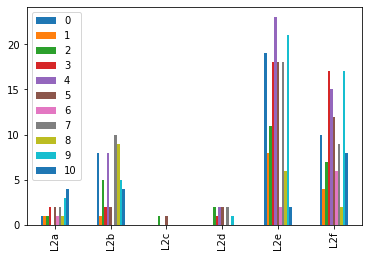

In [18]:
# change in dict analysis in one user
pd.DataFrame(list(df_1['espresso_analysis'])).T.plot(kind='bar')

report.json
report2.json
report3.json
report_P1.json
report_P4.json
report_P5.json
report_P6.json
report_P7.json
report_P8.json
report_pilot_test.json


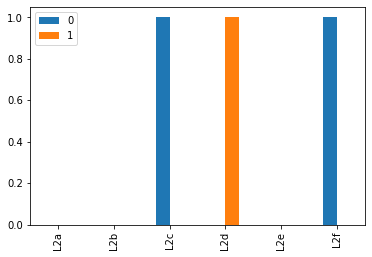

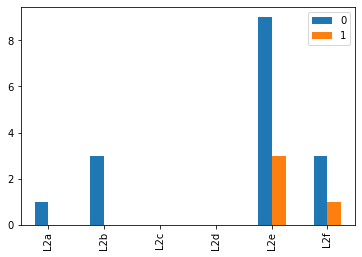

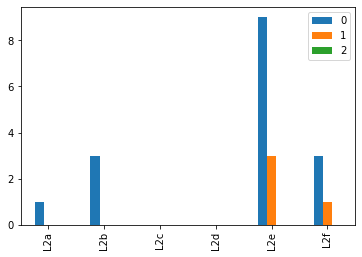

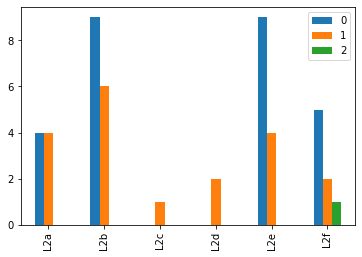

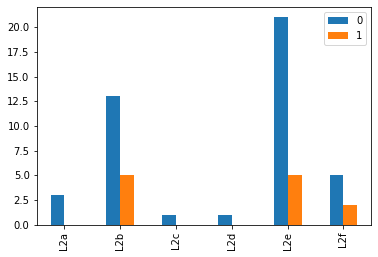

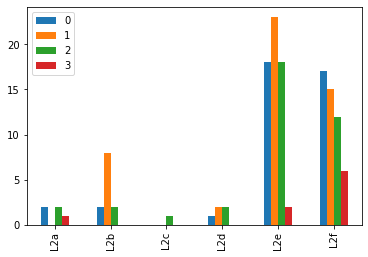

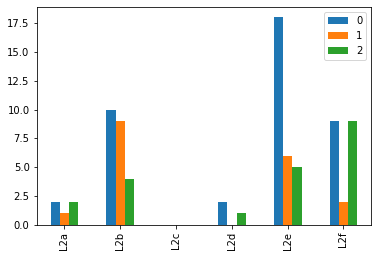

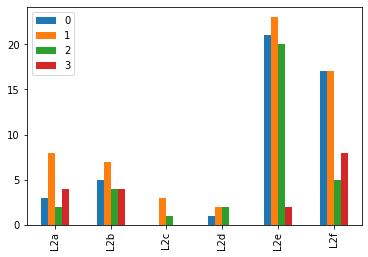

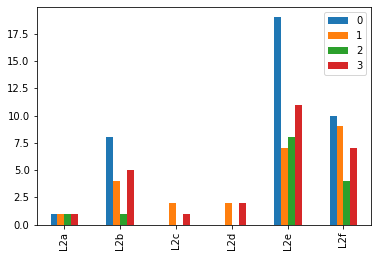

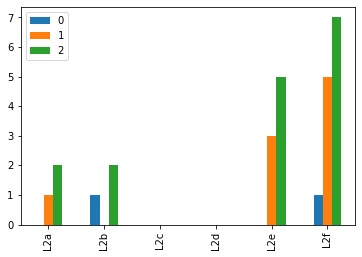

In [54]:
filenames = list(set(df['filename']))
filenames.sort()
for fname in filenames:
    print(fname)
    temp = df[df['filename']==fname].sort_values(by=['start_time'])
    pd.DataFrame(list(temp['espresso_analysis'])).T.plot(kind='bar')

report.json
report2.json
report3.json
report_P1.json
error getting pause_count
report_P4.json
report_P5.json
report_P6.json
report_P7.json
report_P8.json
report_pilot_test.json
error getting pause_count


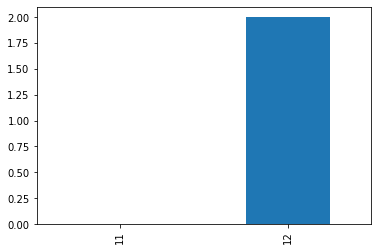

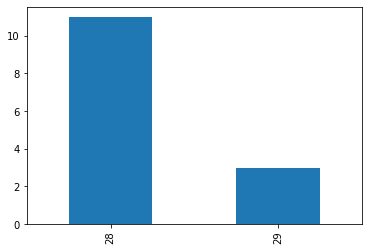

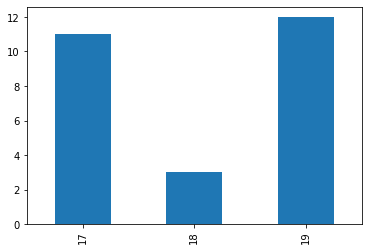

<Figure size 432x288 with 0 Axes>

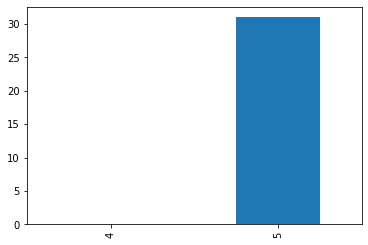

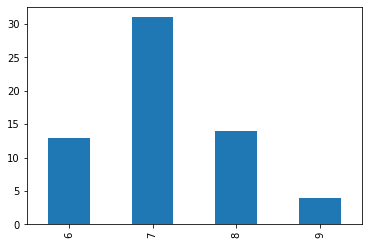

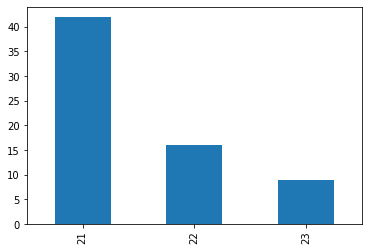

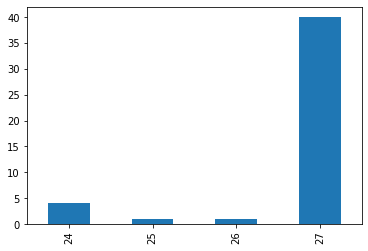

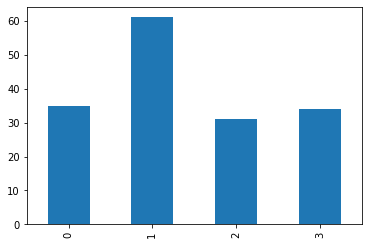

<Figure size 432x288 with 0 Axes>

In [67]:
# plot pause count
# single user
# df_1['pause_count'].plot()
for fname in filenames:
    try:
        print(fname)
        
        temp = df[df['filename']==fname].sort_values(by=['start_time'])
        temp = pd.concat([temp, temp['pauses'].apply(pd.Series)], axis=1).drop(columns="pauses").rename(columns={"plot":"pause_plot", "count": "pause_count", "frequency":"pause_freq", "plot_data": "pause_plotdata"})
        fig = plt.figure()
        temp['pause_count'].plot(kind='bar')
    except:
        print("error getting pause_count")

In [18]:
# progression espresso analysis all users aggregated as time goes on (~3 plots)

In [ ]:
# progression pauses per user (as time goes on 2, 3, notes)

In [68]:
# progression pauses all users as time goes on

In [ ]:
# last sentence before ...